# Logistic Regression:

<p>Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

1 / (1 + e^-value)

Where e is the base of the natural logarithms (Euler’s number or the EXP() function in your spreadsheet) and value is the actual numerical value that you want to transform. </p>
<br>
<p>  Logistic Regression is used when the dependent variable(target) is categorical. <br>
    -<b>For example</b> <br>
    -To predict whether an email is spam (1) or (0) <br>
    -Whether the tumor is malignant (1) or not (0)
</p>
- Note: The name says "Regression" but it actually does classification!


<img src = "logistic regression.jpg">

## Types of Logistic Regression:<br>
<dl>
    
<dt>1. Binary Logistic Regression</dt>
<dd>The categorical response has only two 2 possible outcomes. Example: Spam or Not </dd>
<dt>2. Multinomial Logistic Regression</dt>
<dd>Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)</dd>
<dt>3. Ordinal Logistic Regression</dt>
<dd>Three or more categories with ordering. Example: Movie rating from 1 to 5</dd>
</dl>

## Mathematics behind logistic regression:

<img src = "math_log.jpg">

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [4]:
os.chdir(r'C:\Users\acer\Desktop\PythonProgramming\Machine-Learning-master\Machine-Learning-master\Logistic Regression')

ad_data = pd.read_csv('advertising.csv')
ad_data_new = ad_data.copy()

In [5]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Exploratory data Analysis:

#### Create the histogram of age.

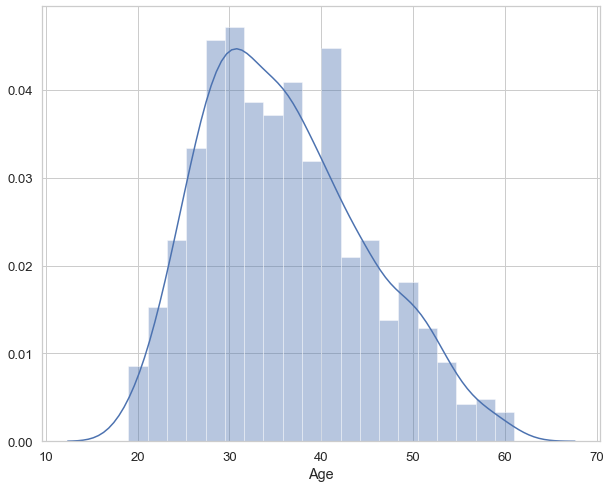

In [12]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.distplot(ad_data['Age'], bins = 20)
plt.show()

#### Create a kde plot of Age based on whether a user has clicked on the ad or not.

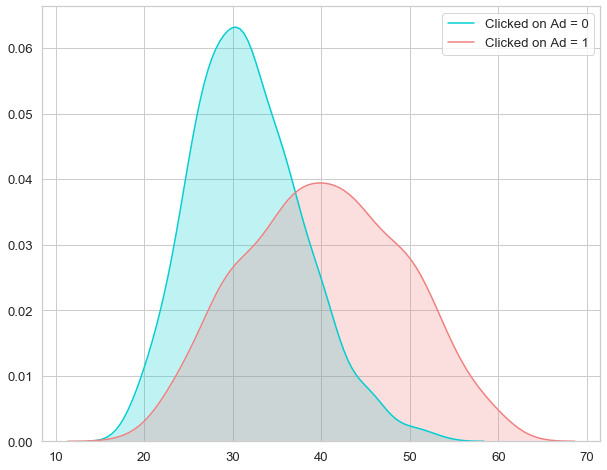

In [17]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.kdeplot(ad_data['Age'][ad_data['Clicked on Ad'] == 0], color = 'darkturquoise', shade = True)
sns.kdeplot(ad_data['Age'][ad_data['Clicked on Ad'] == 1], color = 'lightcoral', shade = True)
plt.legend(['Clicked on Ad = 0', 'Clicked on Ad = 1'])
plt.show()

<p>As we can see, the people who did not click on the ad (blue curve) are aged around 30 years.</p>
<p>Similarly, the people who did click on the ad (red curve) are aged around 40 years with a greater variance.</p>

#### Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.

<Figure size 1440x864 with 0 Axes>

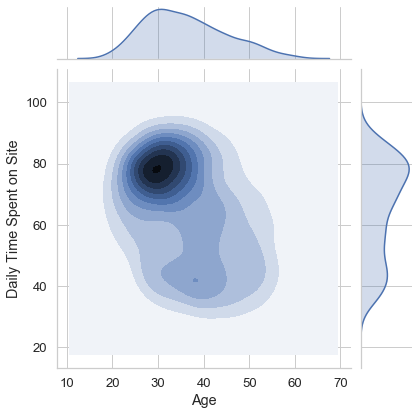

In [32]:
plt.figure(figsize = (20,12))
sns.jointplot(y = ad_data['Daily Time Spent on Site'], x = ad_data['Age'], kind = 'kde')
plt.show()


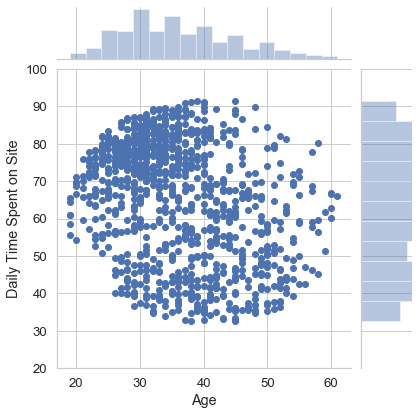

In [30]:
sns.jointplot(y = ad_data['Daily Time Spent on Site'], x = ad_data['Age'])
plt.xlim(10,70)
plt.ylim(20,100)

plt.show()


#### Create a pairplot with the hue defined by the 'Clicked on Ad' column feature.

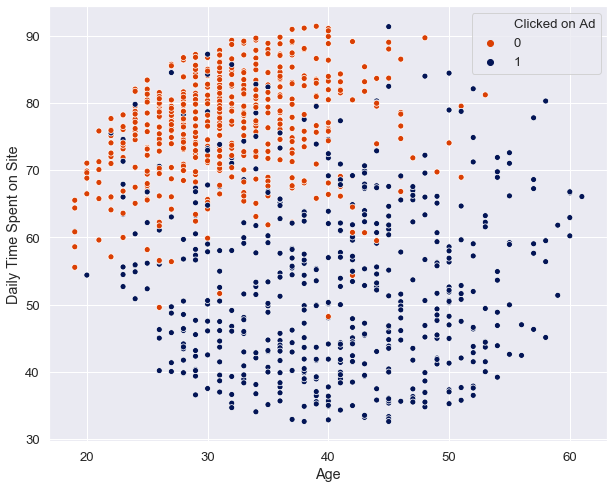

In [53]:
plt.figure(figsize = (10,8))
sns.set(style = 'darkgrid', font_scale = 1.2) 
sns.scatterplot(x = ad_data['Age'], y = ad_data['Daily Time Spent on Site'],
                hue = ad_data['Clicked on Ad'], palette = ['#da3f03', '#031556'])

plt.show()

In [58]:
myCol = ad_data.columns.values
print(myCol)

['Daily Time Spent on Site' 'Age' 'Area Income' 'Daily Internet Usage'
 'Ad Topic Line' 'City' 'Male' 'Country' 'Timestamp' 'Clicked on Ad']


In [59]:
myCol = np.delete(myCol, np.arange(4,9))
myCol

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad'], dtype=object)

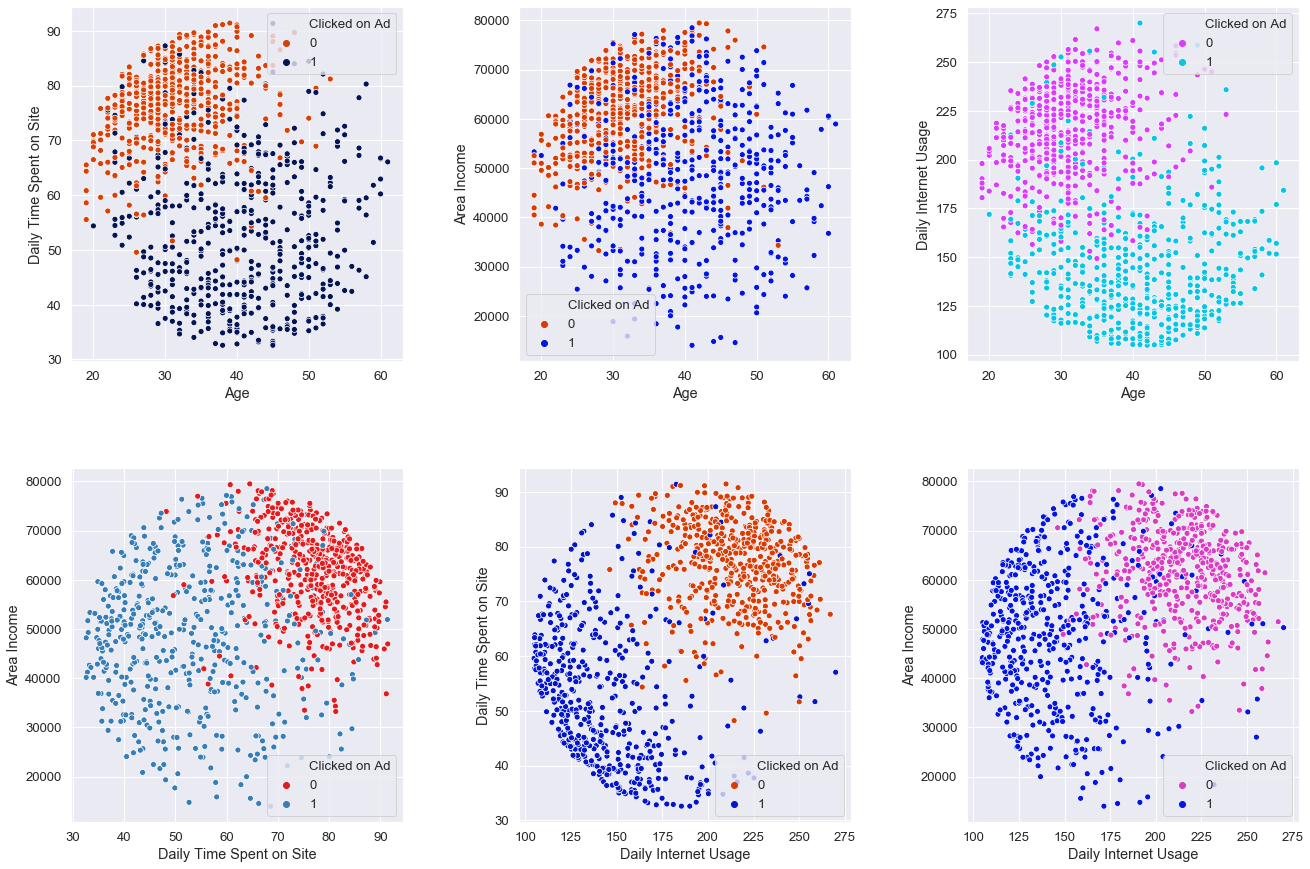

In [70]:
plt.figure(figsize = (22,15))
sns.set(style = 'darkgrid', font_scale = 1.2) 
plt.subplots_adjust(wspace = 0.35, hspace = 0.3)

plt.subplot(2,3,1)
sns.scatterplot(x = ad_data['Age'], y = ad_data['Daily Time Spent on Site'],
                hue = ad_data['Clicked on Ad'], palette = ['#da3f03', '#031556'])

plt.subplot(2,3,2)
sns.scatterplot(x = ad_data['Age'], y = ad_data['Area Income'],
                hue = ad_data['Clicked on Ad'], palette = ['#da3b03', '#0315e6'])

plt.subplot(2,3,3)
sns.scatterplot(x = ad_data['Age'], y = ad_data['Daily Internet Usage'],
                hue = ad_data['Clicked on Ad'], palette = ['#da3bff', '#06c5e6'])

plt.subplot(2,3,4)
sns.scatterplot(x = ad_data['Daily Time Spent on Site'], y = ad_data['Area Income'],
                hue = ad_data['Clicked on Ad'], palette = 'Set1')

plt.subplot(2,3,5)
sns.scatterplot(y = ad_data['Daily Time Spent on Site'], x = ad_data['Daily Internet Usage'],
                hue = ad_data['Clicked on Ad'], palette = ['#da3b03', '#0315cc'])

plt.subplot(2,3,6)
sns.scatterplot(x = ad_data['Daily Internet Usage'], y = ad_data['Area Income'],
                hue = ad_data['Clicked on Ad'], palette = ['#da3cc3', '#0315e6'])


plt.show()

#### Create a barplot showing whether the people who clicked on the ad were males or females.

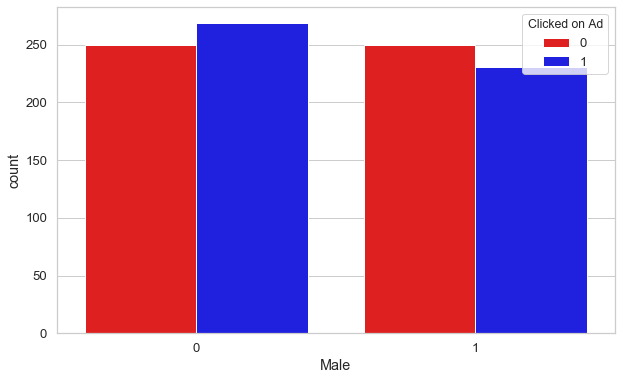

In [79]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.countplot(ad_data['Male'], hue = ad_data['Clicked on Ad'], palette = ['red','blue'])
plt.show()

<p><i>It is seen that males do not tend to click on ads while females do.</i></p>
    - <mark>Indication</mark>: Blue bar in female side is taller than the red bar while the red bar in the male side is taller than the blue one. <br>

## Logistic Regression:

#### Splitting the data into training and testing parts.

In [80]:
ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)

In [81]:
ad_data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0


In [84]:
X = ad_data.drop('Clicked on Ad', axis = 1)
y = ad_data['Clicked on Ad']

In [85]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 101)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
logmodel = LogisticRegression()

In [94]:
logmodel.fit(X_train, y_train)

C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions and Evaluations:
- Predicting the values for test data.

In [95]:
predictions = logmodel.predict(X_test)

In [102]:
mm = np.abs(predictions - y_test)
mm.value_counts()

0    277
1     23
Name: Clicked on Ad, dtype: int64

<p><i>This means there are 23 incorrect predictions in total.</i></p>

### Classification Report:

In [104]:
from sklearn.metrics import classification_report as CR

In [109]:
print(CR(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Confusion Matrix:

In [110]:
from sklearn.metrics import confusion_matrix as cmat

In [111]:
cmat(y_test, predictions)

array([[149,   8],
       [ 15, 128]], dtype=int64)

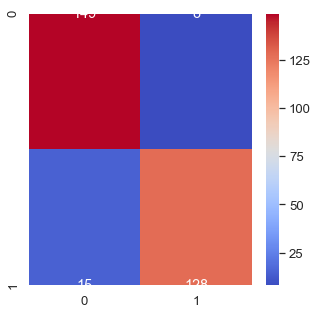

In [118]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.heatmap(cmat(y_test, predictions), annot = True, fmt = 'd', cmap ='coolwarm')
plt.show()

# A guide to sklearn metrics for testing the performance of the classifier:
 - In our case, Logistic Regression.

### 1. Classification accuracy:
- ratio of correct predictions to total predictions made.
<p><mark>Formula</mark></p>: <br>
    <mark>Classification accuracy =  correct predictions / total predictions</mark>
    <br> <br>
- can be easily turned into misclassification ratio or error ratio.
<p><mark>Formula</mark></p>: <br>
    <mark>error rate = (1 - (correct predictions / total predictions))</mark>
    <br><br>
<p><i>Classification accuracy can hide the detail you need to diagnose the performance of your model. But thankfully we can tease apart this detail by using a confusion matrix.</i></p>


### 2. Confusion Matrix:
- A confusion matrix is a summary of prediction results on a classification problem.
- The number of correct and incorrect predictions are summarized with count values and broken down by each class. 

<img src = 'confusion_matrix.jpg'>

<img src = "confusion_matrix2.jpg">

## Definition of the terms:
<br>
<dl>
<dt>True Positive (TP)</dt>
    <dd>Observation is positive, and is predicted to be positive.</dd>
<dt>False Negative (FN)</dt>
    <dd>Observation is positive, but is predicted negative.</dd>
<dt>True Negative (TN)</dt>
    <dd>Observation is negative, and is predicted to be negative.</dd>
<dt>False Positive (FP)</dt>
    <dd> Observation is negative, but is predicted positive.</dd>
</dl>

#### a. Classification Rate/ Accuracy:

<p>Given by the relation:</p> <br>

<img src = "accuracy.png">

##### When to use: When the target variable classes in the data are nearly balanced.
##### When not to use: When the target variables in the data are majority of one class.
<hr>

#### b. Precision:
- what proportion of all predictions that we made with our predictive model are actually true.
- We divide the total number of correctly classified positive examples by the total number of predicted positive examples.
- High Precision indicates an example labeled as positive is indeed positive (small number of FP).
<p><i>If, in our model, precision = 0.76, this means that when our model predicts that a patient has cancer, it is true 76 percent of the time.</i></p>

<img src = "precision.png">
<hr>

#### c. Recall (or sensitivity):
- The measure that tells what proportion of patients that actually had cancer were also predicted of having cancer. 
- It answers the question, “How sensitive the classifier is in detecting positive instances?”
- Ratio of the total number of correctly classified positive examples divide to the total number of positive examples. 
- High Recall indicates the class is correctly recognized (small number of FN).
<p><i>If, in our model, recall is 0.80, it means that 80 percent of all cancer patients are correctly predicted by the model to have cancer.</i></p>

<img src = "recall.png">
<hr>

<dl>
    <dt><mark><b>High recall & Low precision</b></mark></dt>
    <dd>This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.</dd>
    <br>
    <dt><mark><b>Low recall & High precision</b></mark></dt>
    <dd>This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP).</dd>
</dl>
<hr>

#### d. Specificity:
-  It answers question, “How specific or selective is the classifier in predicting positive instances?”
- Specificity = TN / (TN + FP).

#### e. F - measure:
- Harmonic mean of recall and precision as it punishes the extreme values more.

- The F-Measure will always be nearer to the smaller value of Precision or Recall.

<img src = "fmeasure.png">

#### Use case in the above example.

#### Accuracy Score:

In [130]:
from sklearn.metrics import accuracy_score
print("Accuracy Score = ", round((accuracy_score(y_test, predictions)), 2))

Accuracy Score =  0.92


#### Confusion Matrix:

In [119]:
from sklearn.metrics import confusion_matrix as cmat

In [120]:
cmat(y_test, predictions)

array([[149,   8],
       [ 15, 128]], dtype=int64)

##### True Positive (TP) = 149
##### True Negative (TN) = 128
##### False Positive (FP) = 8
##### False Negative (FN) = 15

<p><i>Corresponds to the second figure of confusion matrix. </i><p>
    <hr>

### Classification Report:

In [121]:
from sklearn.metrics import classification_report as CR

In [122]:
print(CR(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Doing it manually:

In [123]:
tp,fp,tn,fn = 149,8,128,15

In [131]:
print('Accuracy Score = ', round(((tp + tn)/ (tp + tn + fp + fn)),2), '\n',
      " Precision = ", round((tp/(tp+fp)), 2), '\n',
      'Recall = ', round((tp/(tp+fn)),2),'\n',
     "support = ", (tp+fp), '\n')

Accuracy Score =  0.92 
  Precision =  0.95 
 Recall =  0.91 
 support =  157 



## ROC and AUC measures:

- Reciever Operating Characteristic.
- It gives us the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) at different classification thresholds.

#### True Positive Rate (TPR):
 - equals Sensitivity.
 - the proportion of observations that are correctly predicted to be positive.

     <p><mark><i>TPR = TP/(TP + FN)</i></mark></p>

#### False Positive Rate (FPR):
 - equals 1 - Specificity.
 - the proportion of observations that are incorrectly predicted to be positive.
 <p><mark><i>TPR = FP/(TN + FP)</i></mark></p>

##### For different threshold values we will get different TPR and FPR.
##### So, in order to visualise which threshold is best suited for the classifier we plot the ROC curve.


<img src = 'roc.jpg'>

<p><i>Two areas separated by the random ROC curve indicates an estimation of the performance level—good or poor.
</i>
</p>

<img src = 'roc1.jpg' style = "height: 200px; width: 250px; float:left;">
<img src = 'roc2.jpg' style = "height: 200px; width: 250px; float:right;">


In [132]:
from sklearn.metrics import roc_auc_score as RA_score
from sklearn.metrics import roc_curve

In [141]:
probability_predictions = logmodel.predict_proba(X_test)
#my_roc_and_auc = RA_score(y_test, predictions)


In [143]:
fpr, tpr, thresholds = roc_curve(y_test, probability_predictions[:,1])

In [144]:
# ROC_AUC Score.
my_roc_auc_score = RA_score(y_test, predictions)
my_roc_auc_score

0.9220747405460781

#### Plotting the ROC Curve.

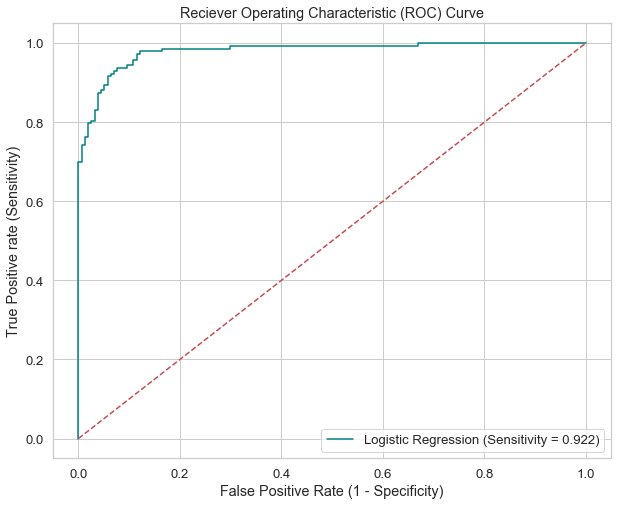

In [152]:
plt.figure(figsize = (10,8))

plt.plot(fpr,tpr, color = 'teal', label = 'Logistic Regression (Sensitivity = %0.3f)' %my_roc_auc_score)
plt.plot(np.linspace(0,1,20), np.linspace(0,1,20), 'r--')

plt.title('Reciever Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive rate (Sensitivity)')
plt.legend(loc = 'lower right')

plt.show()

### Area Under the Curve (AUC):
- It is basically the area under the plotted ROC Curve.
- Greater the area, better is your tuned threshold.

# The End.